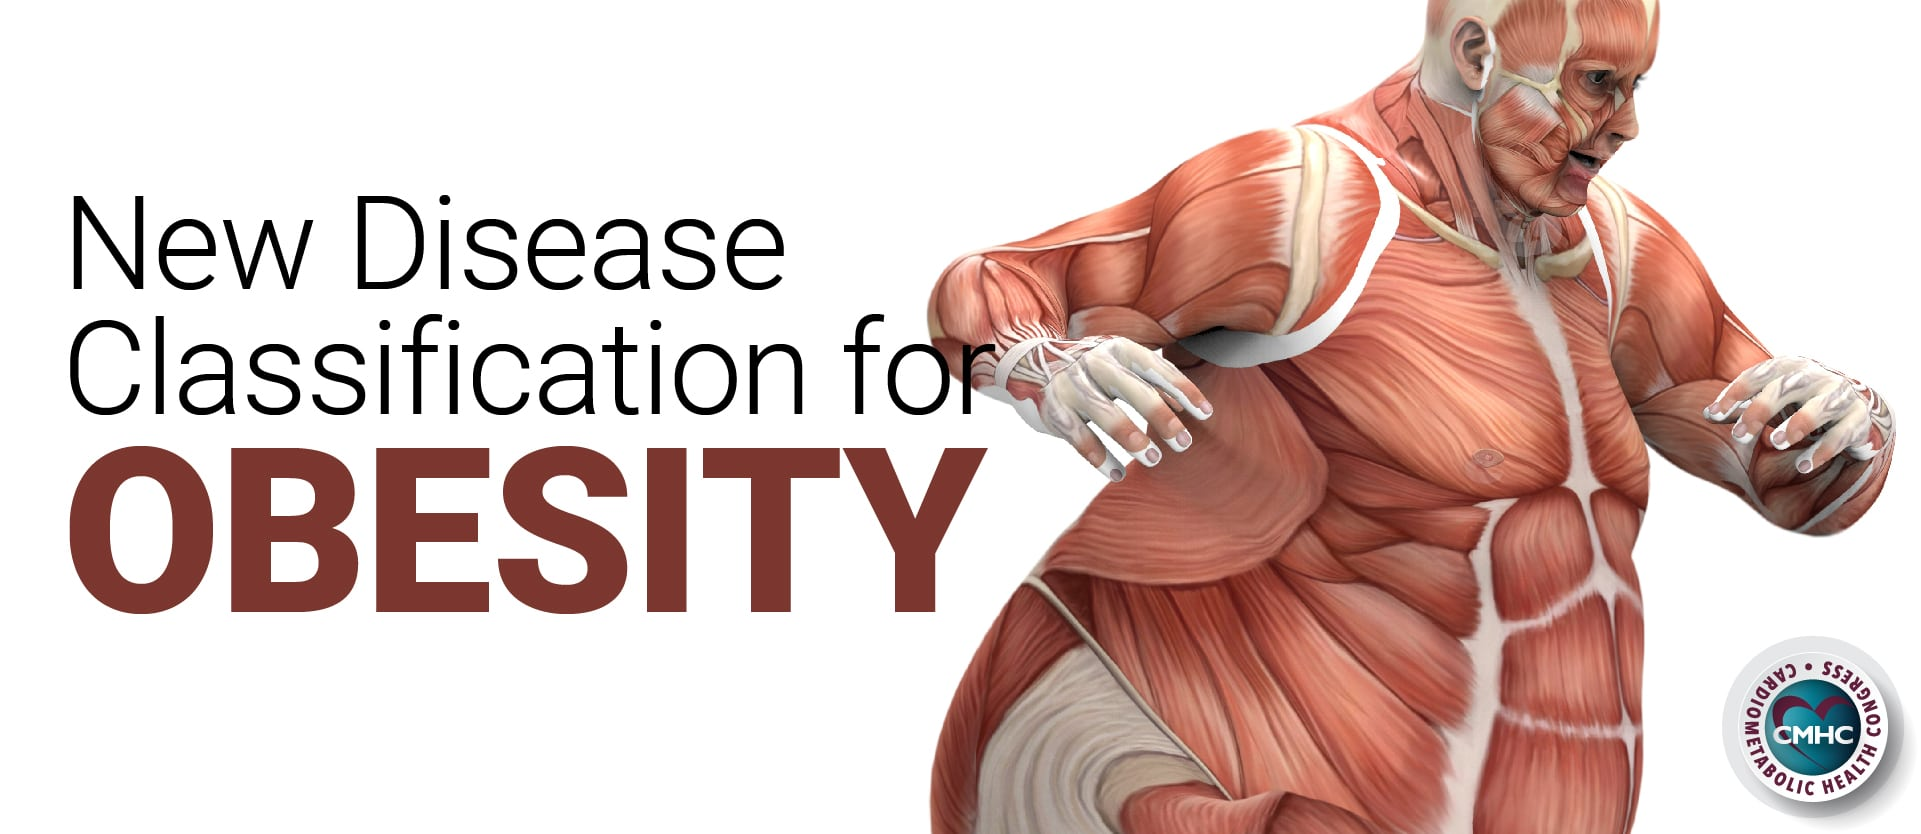

## Obesity Classification
<br>

This project focuses on developing an obesity classifier using machine learning techniques applied to a publicly available dataset from Kaggle. We conducted exploratory data analysis (EDA) to understand the dataset's characteristics and patterns. Subsequently, we implemented various classification algorithms including Decision Trees, Random Forest, SVM, Logistic Regression, KNN, and Gradient Boosting. Performance metrics such as accuracy, precision, recall, and F1-score were used to evaluate and compare the models. This project aims to provide insights into obesity prediction and contribute to public health initiatives combating this global health issue.

## Columns Description

**Gender**: Feature, Categorical, "Gender"
<br>

<br>**Age** : Feature, Continuous, "Age"
<br>

<br>**Height**: Feature, Continuous

<br>**Weight** : Feature Continuous

<br>**family_history_with_overweight**: Feature, Binary, " Has a family member suffered or suffers from overweight? "


<br>**FAVC** : Feature, Binary, " Do you eat high caloric food frequently? "

<br>**FCVC** : Feature, Integer, " Do you usually eat vegetables in your meals? "

<br>**NCP** : Feature, Continuous, " How many main meals do you have daily? "

<br>**CAEC** : Feature, Categorical, " Do you eat any food between meals? "

<br>**SMOKE** : Feature, Binary, " Do you smoke? "

<br>**CH2O**: Feature, Continuous, " How much water do you drink daily? "

<br>**SCC**: Feature, Binary, " Do you monitor the calories you eat daily? "

<br>**FAF**: Feature, Continuous, " How often do you have physical activity? "

<br>**TUE** : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "


<br>**CALC** : Feature, Categorical, " How often do you drink alcohol? "

<br>**MTRANS** : Feature, Categorical, " Which transportation do you usually use? "

<br>**NObeyesdad** : Target, Categorical, "Obesity level"

In [504]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import precision_score,recall_score,ConfusionMatrixDisplay,classification_report,f1_score,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

In [505]:
data=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

## EDA

In [506]:
data.shape

(2111, 17)

In [507]:
data.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [508]:
data.isna().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [509]:
data['NObeyesdad'].value_counts(normalize=True)

NObeyesdad
Obesity_Type_I         0.166272
Obesity_Type_III       0.153482
Obesity_Type_II        0.140692
Overweight_Level_I     0.137376
Overweight_Level_II    0.137376
Normal_Weight          0.135955
Insufficient_Weight    0.128849
Name: proportion, dtype: float64

## Data Visualization

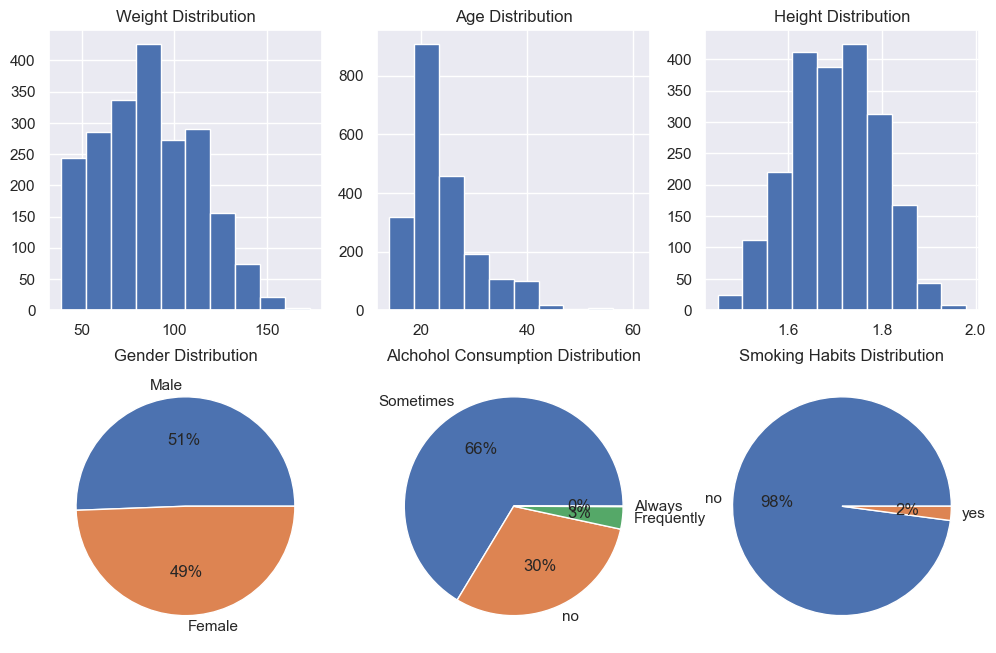

In [510]:
plt.figure(figsize=(12,8))

plt.subplot(2, 3, 1)
plt.hist(data['Weight'])
plt.title("Weight Distribution")


plt.subplot(2, 3, 2)
plt.hist(data["Age"])
plt.title("Age Distribution")


plt.subplot(2, 3, 3)
plt.hist(data['Height'])
plt.title("Height Distribution")


plt.subplot(2, 3, 4)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%.f%%')
plt.title("Gender Distribution")

plt.subplot(2, 3, 5)
plt.pie(data['CALC'].value_counts(),labels=data['CALC'].value_counts().index,autopct='%.f%%')
plt.title("Alchohol Consumption Distribution")



plt.subplot(2, 3, 6)
plt.pie(data['SMOKE'].value_counts(),labels=data['SMOKE'].value_counts().index,autopct='%.f%%')
plt.title("Smoking Habits Distribution")

plt.show()

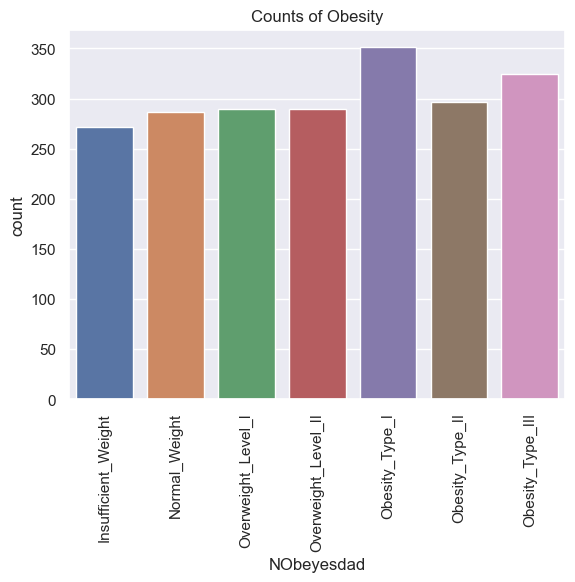

<function xticks at 0x0000021254652A20>


In [511]:
order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']

sns.countplot(data=data,x='NObeyesdad',order=order)
plt.title('Counts of Obesity')
plt.xticks(rotation=90)
plt.show()
print(plt.xticks)

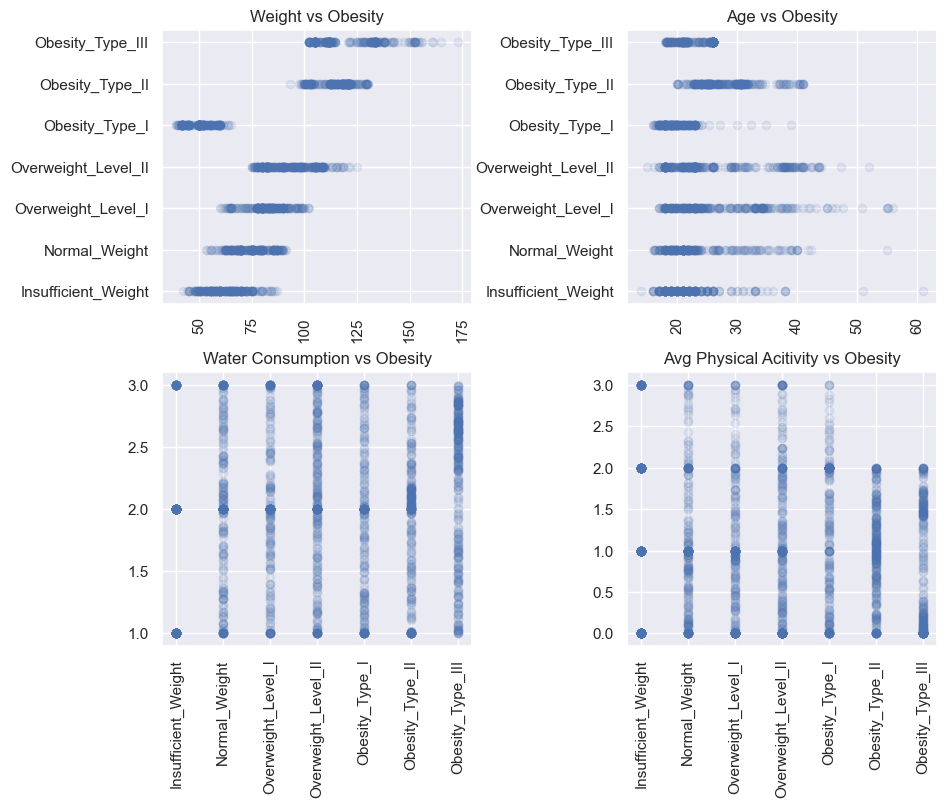

In [512]:
# sns.set()

order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Obesity_Type_II',
       'Obesity_Type_III']
ticks=['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III']

plt.figure(figsize=(10,8))


plt.subplots_adjust(hspace=0.25, wspace=0.5)

plt.subplot(2,2,1)
plt.scatter(data['Weight'],data['NObeyesdad'],alpha=0.1)
plt.xticks(rotation=90)
plt.title("Weight vs Obesity")
plt.yticks(ticks,order)

plt.subplot(2,2,2)
plt.scatter(data['Age'],data['NObeyesdad'],alpha=0.1)
plt.xticks(rotation=90)
plt.title("Age vs Obesity")
plt.yticks(ticks,order)

plt.subplot(2,2,3)
plt.scatter(data['NObeyesdad'],data['CH2O'],alpha=0.1)
plt.xticks(rotation=90)
plt.title("Water Consumption vs Obesity")
plt.xticks(ticks,order)

plt.subplot(2,2,4)
plt.scatter(data['NObeyesdad'],data['FAF'],alpha=0.1)
plt.xticks(rotation=90)
plt.title("Avg Physical Acitivity vs Obesity")
plt.xticks(ticks,order)

plt.show()

## Splitting Data into Training and Test

In [513]:
inputs=data.drop(['NObeyesdad'],axis=1)
targets=data[['NObeyesdad']]

In [514]:
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size=0.2,stratify=targets)

In [515]:
y_train.value_counts()

NObeyesdad         
Obesity_Type_I         281
Obesity_Type_III       259
Obesity_Type_II        237
Overweight_Level_I     232
Overweight_Level_II    232
Normal_Weight          229
Insufficient_Weight    218
Name: count, dtype: int64

In [516]:
y_test.value_counts()

NObeyesdad         
Obesity_Type_I         70
Obesity_Type_III       65
Obesity_Type_II        60
Normal_Weight          58
Overweight_Level_I     58
Overweight_Level_II    58
Insufficient_Weight    54
Name: count, dtype: int64

In [517]:
x_train.shape

(1688, 16)

## Transforming Inputs and Targets

In [518]:
ord_enc=OrdinalEncoder()
lab_enc=LabelEncoder()

In [519]:
data.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [520]:
str_columns=['Gender', 'CALC', 'FAVC','SCC', 'SMOKE', 'family_history_with_overweight',
       'CAEC', 'MTRANS']
int_columns=['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

columns_order=['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS']

# print("PRevious Concatenation",x_train_trans.shape)


x_train_trans=ord_enc.fit_transform(x_train[str_columns])
x_test_trans=ord_enc.transform(x_test[str_columns])

x_train[str_columns]=x_train_trans
x_test[str_columns]=x_test_trans

y_train_trans=lab_enc.fit_transform(y_train)
y_test_trans=lab_enc.transform(y_test)

x_train_trans.shape,y_train_trans.shape

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


((1688, 8), (1688,))

In [521]:
dict(zip(lab_enc.classes_, range(len(lab_enc.classes_))))

{'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Obesity_Type_I': 2,
 'Obesity_Type_II': 3,
 'Obesity_Type_III': 4,
 'Overweight_Level_I': 5,
 'Overweight_Level_II': 6}

In [522]:
scaler=MinMaxScaler(feature_range=(-1,1))

scaled_inputs=scaler.fit_transform(x_train)

# Model 1: Support Vector Machine

In [523]:
svm_classifier = OneVsOneClassifier(SVC(kernel='linear'))

svm_classifier.fit(x_train,y_train_trans)
svm_classifier.score(x_train,y_train_trans)

0.8998815165876777

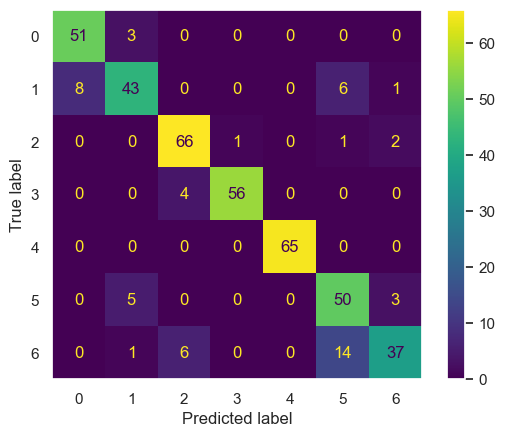

In [524]:
pr=svm_classifier.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test_trans,pr)
plt.grid(visible=False)
plt.show()

In [525]:
print(classification_report(y_test_trans,pr))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        54
           1       0.83      0.74      0.78        58
           2       0.87      0.94      0.90        70
           3       0.98      0.93      0.96        60
           4       1.00      1.00      1.00        65
           5       0.70      0.86      0.78        58
           6       0.86      0.64      0.73        58

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.86       423
weighted avg       0.88      0.87      0.87       423



In [526]:
svm_classifier.score(x_test,y_test_trans)

0.8699763593380615

# Model 2: Logistic Regression

In [527]:
from sklearn.linear_model import LogisticRegression

reg=LogisticRegression(multi_class='multinomial',max_iter=1000,solver='lbfgs')
reg.fit(x_train,y_train_trans)

C:\Users\vaibh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [528]:
reg.score(x_test,y_test_trans),reg.score(x_train,y_train_trans)

(0.8203309692671394, 0.8281990521327014)

In [529]:
pr=reg.predict(x_test)

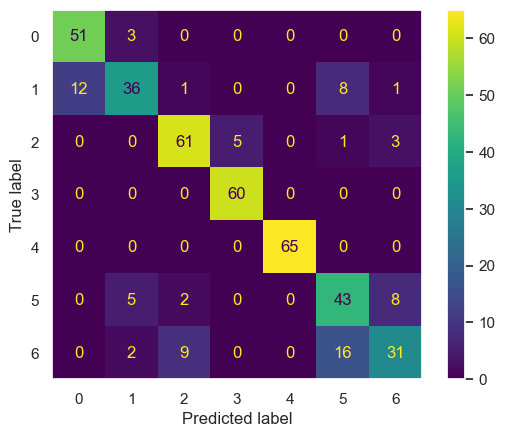

In [530]:
ConfusionMatrixDisplay.from_predictions(y_test_trans,pr)
plt.grid(visible=False)
plt.show()

In [531]:
print(classification_report(y_test_trans,pr))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        54
           1       0.78      0.62      0.69        58
           2       0.84      0.87      0.85        70
           3       0.92      1.00      0.96        60
           4       1.00      1.00      1.00        65
           5       0.63      0.74      0.68        58
           6       0.72      0.53      0.61        58

    accuracy                           0.82       423
   macro avg       0.81      0.82      0.81       423
weighted avg       0.82      0.82      0.81       423



In [532]:
print(accuracy_score(y_test_trans,pr))

0.8203309692671394


In [533]:
pd.DataFrame(y_test_trans).value_counts()

2    70
4    65
3    60
1    58
5    58
6    58
0    54
Name: count, dtype: int64

# Model 3: Random Forest Classifier

In [534]:
from sklearn.ensemble import RandomForestClassifier

clr=RandomForestClassifier(max_depth=50,min_samples_split=4,n_estimators=100)

clr.fit(x_train,y_train_trans)

RandomForestClassifier(max_depth=50, min_samples_split=4)

In [535]:
clr.score(x_test,y_test_trans),clr.score(x_train,y_train_trans)

(0.950354609929078, 1.0)

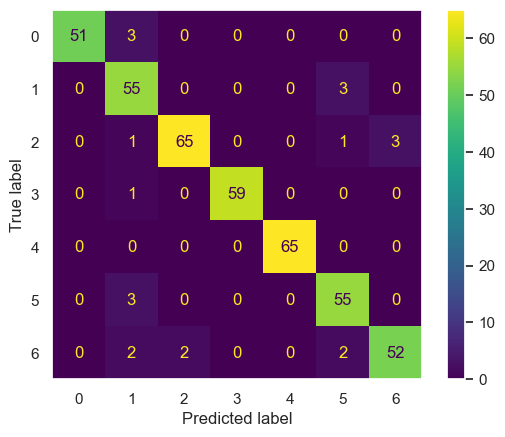

In [536]:
pr=clr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_trans,pr)
plt.grid(visible=False)
plt.show()

# Model 4: Decision Tree Classifier

In [537]:
from sklearn.tree import DecisionTreeClassifier

tree_clr=DecisionTreeClassifier(max_depth=10,min_samples_split=5)
tree_clr.fit(x_train,y_train_trans)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [538]:

tree_clr.score(x_train,y_train_trans),tree_clr.score(x_test,y_test_trans)

(0.9840047393364929, 0.9290780141843972)

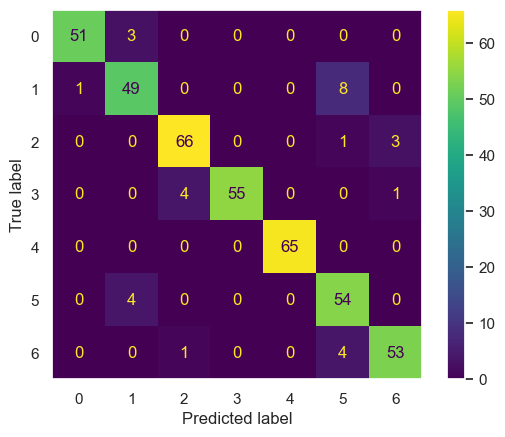

In [539]:
pr=tree_clr.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test_trans,pr)
plt.grid(visible=False)
plt.show()

In [540]:
print(classification_report(y_test_trans,pr))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.88      0.84      0.86        58
           2       0.93      0.94      0.94        70
           3       1.00      0.92      0.96        60
           4       1.00      1.00      1.00        65
           5       0.81      0.93      0.86        58
           6       0.93      0.91      0.92        58

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



# Model 5: GD Boost Classifier

In [541]:
from sklearn.ensemble import GradientBoostingClassifier

gdboost=GradientBoostingClassifier()
gdboost.fit(x_train,y_train_trans)

GradientBoostingClassifier()

In [542]:
gdboost.score(x_train,y_train_trans),gdboost.score(x_test,y_test_trans)

(0.9994075829383886, 0.966903073286052)

In [543]:
pr_gdboost=gdboost.predict(x_test)

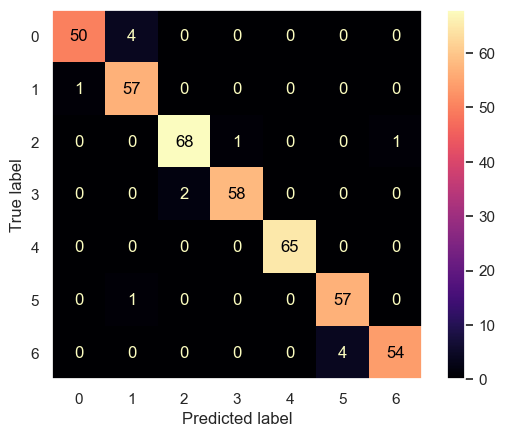

In [544]:

ConfusionMatrixDisplay.from_predictions(y_test_trans,pr_gdboost,cmap='magma')
plt.grid(visible=False)
plt.show()

In [545]:
print(classification_report(y_test_trans,pr_gdboost))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.92      0.98      0.95        58
           2       0.97      0.97      0.97        70
           3       0.98      0.97      0.97        60
           4       1.00      1.00      1.00        65
           5       0.93      0.98      0.96        58
           6       0.98      0.93      0.96        58

    accuracy                           0.97       423
   macro avg       0.97      0.97      0.97       423
weighted avg       0.97      0.97      0.97       423



# Evaluating Different Models

In [567]:
models_name=["SVM","Logistic",'Random Forest','Decision Tree','GD Boost']
models_test=[0.88,.82,.95,.93,.97]
models_train=[0.90,.83,1,.98,1]
models_over=['y','n','n','y','n']

models=pd.DataFrame(
    { "Train_Accuracy":models_train,
      "Test Accuracy":models_test,
      "Model lacks in one Target":models_over
},index=models_name)

In [568]:
models

,Train_Accuracy,Test Accuracy,Model lacks in one Target
SVM,0.90,0.88,y
Logistic,0.83,0.82,n
Random Forest,1.00,0.95,n
Decision Tree,0.98,0.93,y
GD Boost,1.00,0.97,n


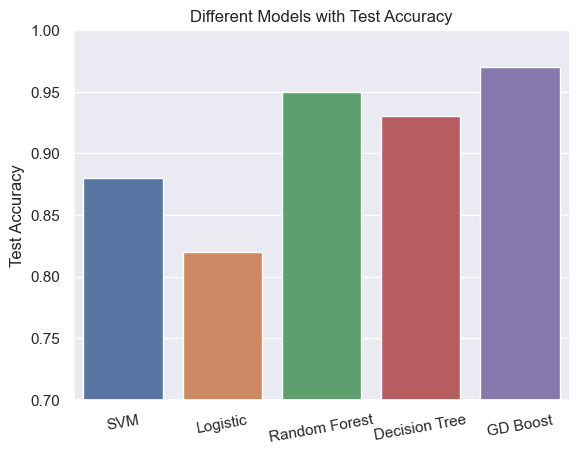

In [569]:
sns.barplot(data=models,x=models.index,y='Test Accuracy')
plt.ylim(0.7,1)
plt.title("Different Models with Test Accuracy")
plt.xticks(rotation=10)
plt.show()

### From this chart, we can see that GD Boost Classifier is best with 97% Test Accuracy